### Fare analysis - London to Amsterdam ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
data_full = pd.read_csv('Downloads\London-AMS_fares.csv')
#data_full = data_full.append(pd.read_csv('Downloads\LGW-AMS_fares.csv'),ignore_index=True)

In [4]:
data_full['Day'] = data_full['Flight Date'].apply(lambda x: pd.to_datetime(x).day)
data_full['Month'] = data_full['Flight Date'].apply(lambda x: pd.to_datetime(x).month)
data_full['Year'] = data_full['Flight Date'].apply(lambda x: pd.to_datetime(x).year)

data_full['Dep Time (local)'] = pd.to_datetime(data_full['Dep Time (local)']).dt.time
data_full['Arr Time (local)'] = pd.to_datetime(data_full['Arr Time (local)']).dt.time

data_full = data_full[['Origin', 'Destination', 'Airline', 'Flight Date', 'Day', 'Month', 'Year', 'Weekday',
       'Dep Time (local)', 'Arr Time (local)', 'Price', 'Currency',
       'Fare Extraction Date']]

In [5]:
data_full.head()

,Origin,Destination,Airline,Flight Date,Day,Month,Year,Weekday,Dep Time (local),Arr Time (local),Price,Currency,Fare Extraction Date
0,LHR,AMS,British Airways,2020-04-17,17,4,2020,Friday,11:45:00,14:05:00,405,GBP,2020-04-15
1,LHR,AMS,British Airways,2020-04-18,18,4,2020,Saturday,11:45:00,14:05:00,262,GBP,2020-04-15
2,LHR,AMS,KLM,2020-04-19,19,4,2020,Sunday,10:25:00,12:55:00,140,GBP,2020-04-15
3,LHR,AMS,British Airways,2020-04-19,19,4,2020,Sunday,11:45:00,14:05:00,249,GBP,2020-04-15
4,LHR,AMS,KLM,2020-04-20,20,4,2020,Monday,10:25:00,12:55:00,119,GBP,2020-04-15


**Explore all months**

Keep latest data:

In [6]:
data = data_full[data_full['Fare Extraction Date']==data_full['Fare Extraction Date'].max()]

Price variation by origin airport:

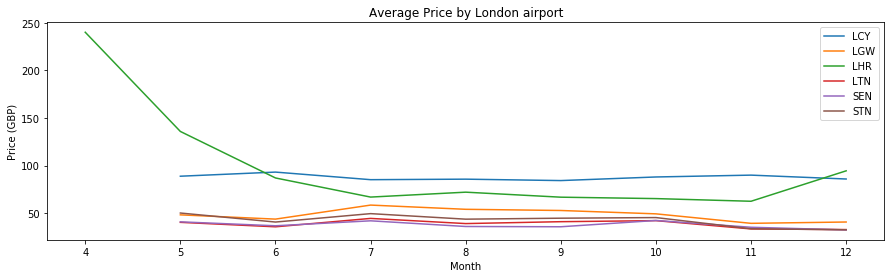

In [9]:
by_airport_month = pd.DataFrame(data.groupby(['Origin','Month'])['Price'].mean()).reset_index()
plt.figure(figsize=(15, 4))
for origin in by_airport_month['Origin'].unique():
    plt.plot(by_airport_month[by_airport_month['Origin']==origin]['Month'],by_airport_month[by_airport_month['Origin']==origin]['Price'],label=origin)
plt.xlabel('Month')
plt.ylabel('Price (' + data.iloc[0].Currency + ')')
plt.title('Average Price by London airport')
plt.legend()
plt.show()

Price variation by airline:

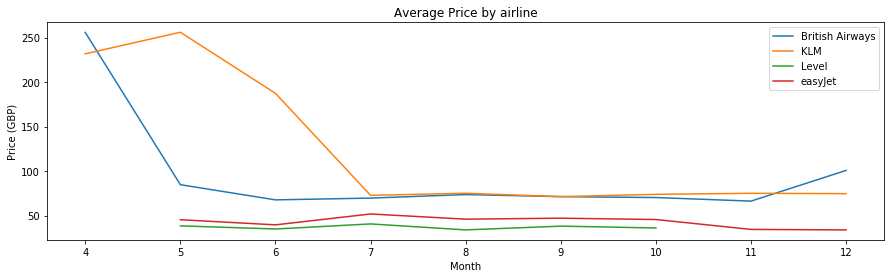

In [10]:
by_airline_month = pd.DataFrame(data.groupby(['Airline','Month'])['Price'].mean()).reset_index()
airlines_list = by_airline_month['Airline'].unique()
plt.figure(figsize=(15, 4)) 

for airline in airlines_list:
    plt.plot(by_airline_month[by_airline_month['Airline']==airline]['Month'],by_airline_month[by_airline_month['Airline']==airline]['Price'],label=airline)
plt.xlabel('Month')
plt.ylabel('Price (' + data.iloc[0].Currency + ')')
plt.title('Average Price by airline')
plt.legend()
plt.show()

**Explore selected month**

In [11]:
month = 5
month_name = datetime.date(1900, month, 1).strftime('%B')

Average price by airline in selected month:

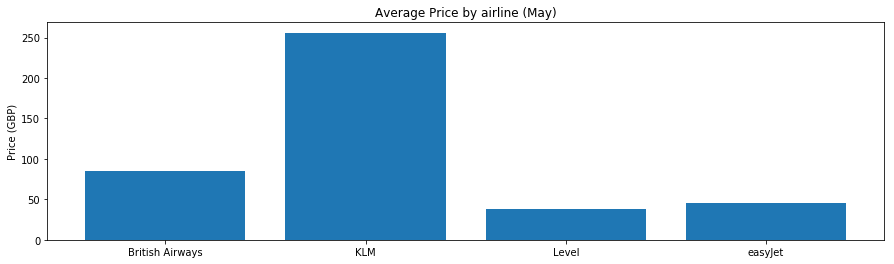

In [12]:
by_airline = data[data.Month==month].groupby(['Airline'])['Price'].mean()

plt.figure(figsize=(15, 4))
plt.bar(by_airline.index,by_airline.values)
plt.ylabel('Price (' + data.iloc[0].Currency + ')')
plt.title('Average Price by airline (' + month_name + ')' )
plt.show()


Average price by flight date in selected month:

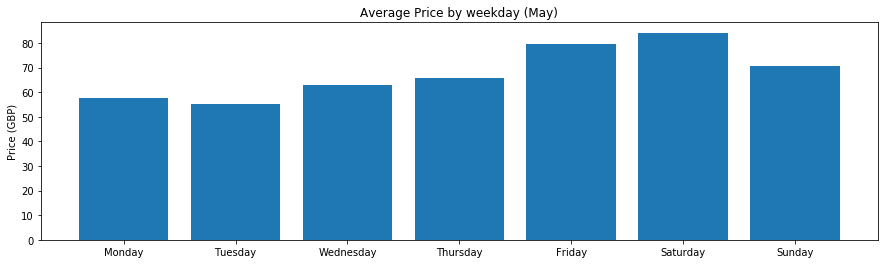

In [13]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
by_weekday = data[data.Month==month].groupby(['Weekday'])['Price'].mean()
by_weekday = by_weekday.reindex(cats)

plt.figure(figsize=(15, 4))
plt.bar(by_weekday.index,by_weekday.values)
plt.ylabel('Price (' + data.iloc[0].Currency + ')')
plt.title('Average Price by weekday (' + month_name + ')' )
plt.show()

Price variation by dep time & day and dep time & airline (heatmaps):

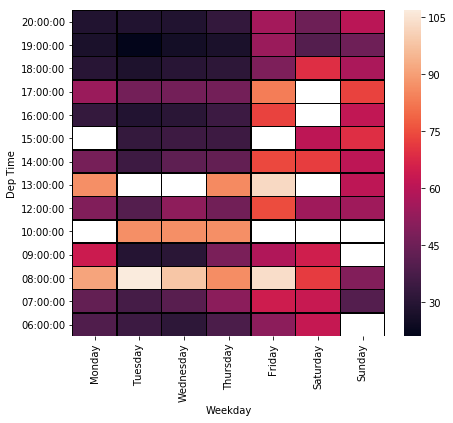

In [115]:
import seaborn as sns
plt.figure(figsize=(7, 6))
by_day_time = data[(data.Month==month)&(data.Airline!='KLM')]
#Group dep times 
time_rounded = by_day_time['Dep Time (local)'].apply(lambda dt: datetime.time(dt.hour,0))
#30*(dt.minute // 30)))
by_day_time.insert(by_day_time.shape[1],'Rounded Dep Time',time_rounded)
by_day_time = pd.DataFrame(by_day_time.groupby(['Weekday','Rounded Dep Time'])['Price'].mean()).reset_index()
by_day_time = by_day_time.rename(columns={'Rounded Dep Time': 'Dep Time'})
by_day_time = by_day_time.pivot(index='Dep Time', columns='Weekday', values='Price')
by_day_time = by_day_time.reindex(cats,axis=1)
ax = sns.heatmap(by_day_time,linewidths=.5,linecolor='black')
ax.invert_yaxis()
plt.show()

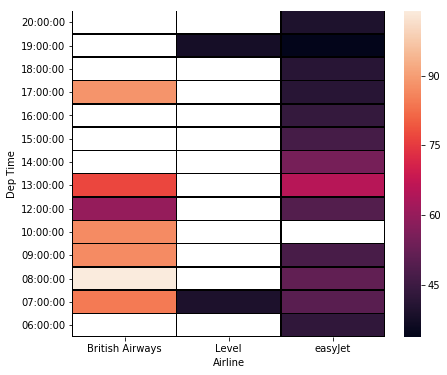

In [117]:
import seaborn as sns
plt.figure(figsize=(7, 6))
by_day_time = data[(data.Month==month)&(data.Airline!='KLM')]
#Group dep times 
time_rounded = by_day_time['Dep Time (local)'].apply(lambda dt: datetime.time(dt.hour,0))
#30*(dt.minute // 30)))
by_day_time.insert(by_day_time.shape[1],'Rounded Dep Time',time_rounded)
by_day_time = pd.DataFrame(by_day_time.groupby(['Airline','Rounded Dep Time'])['Price'].mean()).reset_index()
by_day_time = by_day_time.rename(columns={'Rounded Dep Time': 'Dep Time'})
by_day_time = by_day_time.pivot(index='Dep Time', columns='Airline', values='Price')
ax = sns.heatmap(by_day_time,linewidths=.5,linecolor='black')
ax.invert_yaxis()
plt.show()

Price variation from selected origin airport over a month:

In [ ]:
airports = ['LTN']

data['Day_weekday'] = data['Day'].astype(str) + ' (' + data['Weekday'].str[:3] + ')'

by_day = data[(data.Month==month) & data.Origin.isin(airports)].groupby(['Day','Day_weekday'])['Price'].mean().reset_index()
plt.figure(figsize=(15, 4))
plt.bar(by_day['Day_weekday'],by_day['Price'])
plt.xticks(rotation=90)
plt.ylabel('Price (' + data.iloc[0].Currency + ')')

airports_list = airports[0]
for airport in airports[1:]:
    airports_list += ', ' + airport

plt.title('Average Price from ' + airports_list + ' by day (' + month_name + ')' )
plt.show()

data = data.drop(['Day_weekday'],axis=1)

**Search flights that satisfy given specs:**

In [ ]:
def filter_flights(dates=None, months=None, weekdays='All', airports='All', airlines='All', dep_time_before = None, dep_time_after = None, arr_time_before = None, arr_time_after = None, query='All'):
       
    if dates:
        weekdays == 'All' #If specific date is provided then neglect weekdays field
    
    if dates:
        dates = [dates] if isinstance(dates, int) else dates
    else:
        dates = data.Day.unique()
    
    if months:
        months = [months] if isinstance(months, int) else months
    else:
        months = data.Month.unique()
     
    if weekdays == 'All':
        weekdays = data.Weekday.unique()
    elif isinstance(weekdays, str):
        weekdays = [weekdays]

    if airports == 'All':
        airports = data.Origin.unique()
    elif isinstance(airports, str):
        airports = [airports]
        
    if airlines == 'All':
        airlines = data.Airline.unique()
    elif isinstance(airlines, str):
        airlines = [airlines]
    
    dep_time_before = datetime.time(23,59,0) if dep_time_before == None else datetime.datetime.strptime(dep_time_before, '%H:%M').time()
    dep_time_after = datetime.time(0,0,0) if dep_time_after == None else datetime.datetime.strptime(dep_time_after, '%H:%M').time()
    
    arr_time_before = datetime.time(23,59,0) if arr_time_before == None else datetime.datetime.strptime(arr_time_before, '%H:%M').time()
    arr_time_after = datetime.time(0,0,0) if arr_time_after == None else datetime.datetime.strptime(arr_time_after, '%H:%M').time()
    
    flights = data[(data.Day.isin(dates))&(data.Month.isin(months))&(data.Weekday.isin(weekdays))&(data.Origin.isin(airports))&(data.Airline.isin(airlines))&(data['Dep Time (local)']<dep_time_before)&(data['Dep Time (local)']>dep_time_after)&(data['Arr Time (local)']<arr_time_before)&(data['Arr Time (local)']>arr_time_after)]
    
    if query == 'Cheapest':
        flights = flights[flights.Price==min(flights.Price)]
    
    flights = flights.sort_values(by=['Price'])
    flights = flights[['Origin', 'Destination', 'Airline', 'Flight Date', 'Weekday', 'Dep Time (local)', 'Arr Time (local)', 'Price', 'Currency']]
    
    return flights    

Cheapest easyJet flight on a Friday in May and June that departs after 19:00:

In [ ]:
filter_flights(weekdays='Friday', months=[5,6], airports='All', airlines='easyJet', query='Cheapest', dep_time_after='19:00')

Flights on Thursdays and Fridays in May from LHR that depart between 07:00 and 12:00 (sorted by price in ascending order):

In [ ]:
filter_flights(weekdays=['Thursday','Friday'], months=5, airports=['LHR'], airlines='All', query='All', dep_time_after='07:00', dep_time_before='12:00')

Flights between 1 and 10 July from LHR or LGW that depart after 19:00 (sorted by price in ascending order):

In [ ]:
filter_flights(dates=list(range(1,10)), months=7, airports=['LHR','LGW'], airlines='All', query='All', dep_time_after='19:00')